In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
import tensorflow_datasets as tfds
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout

In [20]:
(X,y),(X_test,y_test) = fashion_mnist.load_data()

In [21]:
print(X.shape,y.shape)

(60000, 28, 28) (60000,)


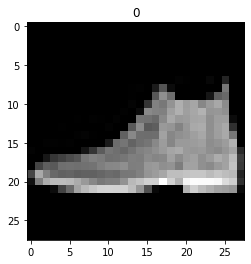

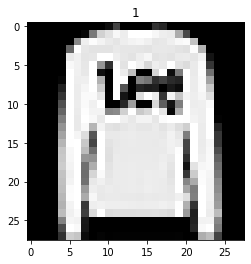

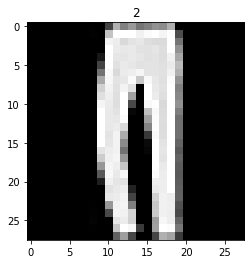

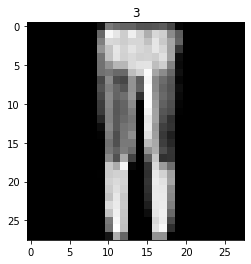

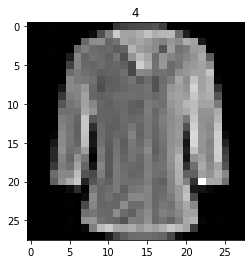

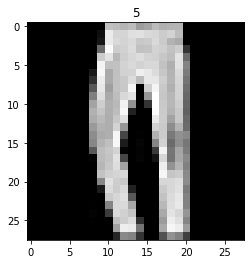

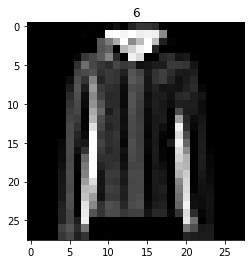

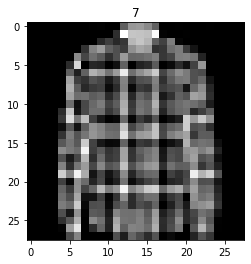

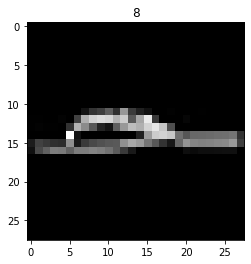

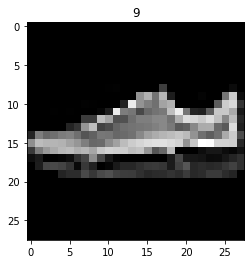

In [5]:
for i in range(10):
  plt.title(i)
  plt.imshow(X[i].reshape((28,28)),cmap = "gray")
  plt.show()

In [22]:
y = np_utils.to_categorical(y)
X = X.reshape((60000,28,28,1))

In [23]:
X = X.astype('float32')/255.0

CNN Model

In [24]:
# model = Sequential()
# model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)))
# model.add(Convolution2D(64,(3,3),activation = 'relu'))
# model.add(Dropout(.25))
# model.add(MaxPooling2D(2,2)) 
# model.add(Convolution2D(32,(5,5),activation = 'relu'))
# model.add(Convolution2D(8,(5,5),activation = 'relu'))
# model.add(Flatten())
# model.add(Dense(10,activation = 'softmax'))
# model.summary()
# model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
hist = model.fit(X,y,epochs = 10,shuffle = True,batch_size = 32,validation_split = .20)

Epoch 1/10
1500/1500 [==============================] - 31s 20ms/step - loss: 0.4039 - accuracy: 0.8565 - val_loss: 0.3006 - val_accuracy: 0.8943
Epoch 2/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2691 - accuracy: 0.9027 - val_loss: 0.2704 - val_accuracy: 0.9051
Epoch 3/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2253 - accuracy: 0.9168 - val_loss: 0.2584 - val_accuracy: 0.9083
Epoch 4/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.1908 - accuracy: 0.9281 - val_loss: 0.2503 - val_accuracy: 0.9123
Epoch 5/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.1637 - accuracy: 0.9395 - val_loss: 0.2446 - val_accuracy: 0.9147
Epoch 6/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.1413 - accuracy: 0.9477 - val_loss: 0.2497 - val_accuracy: 0.9166
Epoch 7/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.1217 - accuracy: 0.9543 - val_loss: 0.2740 -

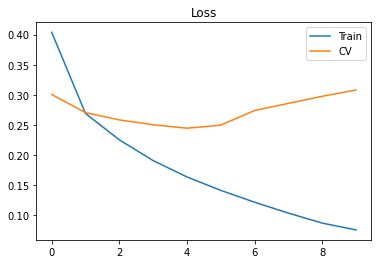

In [27]:
plt.title('Loss')
plt.plot(hist.history['loss'],label = 'Train')
plt.plot(hist.history['val_loss'],label = 'CV')
plt.legend()
plt.show()

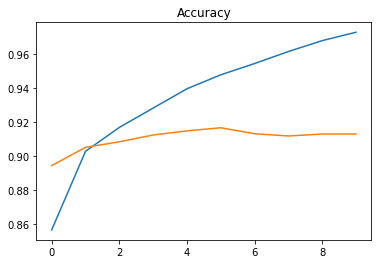

In [28]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'],label = 'Train')
plt.plot(hist.history['val_accuracy'],label= 'CV')